In [1]:
import numpy as np
import dynamiqs as dq

Task 1.1

(20, 5)


|██████████| 100.0% ◆ elapsed 5.81s ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:10<00:00,  4.60it/s]


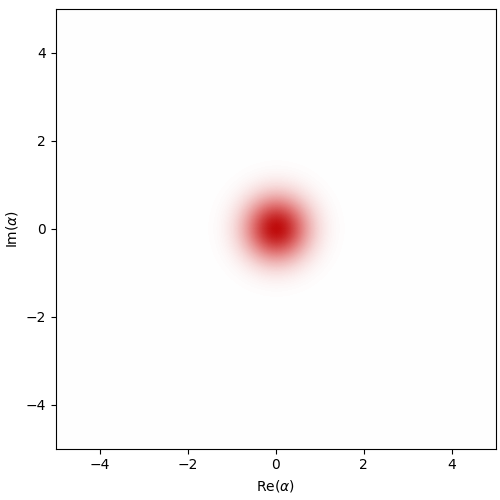

In [ ]:
# Parameters
na = 20 # Hilbert space dimension
nb = 5
g2 = 1
epsilon_d = -4
kappa_b = 10

adag = dq.create(na)
a = dq.destroy(na)
a_id, id = dq.destroy(na, nb)
bdag = dq.create(nb)
b = dq.destroy(nb)
id, id_bdag = dq.create(na, nb)
H_2ph = g2 * dq.tensor(adag @ adag, b) + dq.dag(g2 * dq.tensor(adag @ adag, b))
H_d = epsilon_d * id_bdag + dq.dag(epsilon_d * id_bdag)

psi0 = dq.fock((na,nb), (0,0)) # initial state
H = H_2ph + H_d
# H = dq.zero(na)
kappa_2 = 1 # two-photon loss rate
alpha = 2.0 # cat size
tsave = np.linspace(0, 4, 100)
# print(a_id@a_id, dq.eye(na*nb))
# print(type(a_id@a_id))
# print(type(dq.eye(na*nb)))
loss_op = dq.asqarray(np.sqrt(kappa_2)*(a_id @ a_id - alpha**2 * dq.eye(na, nb)), dims=(20,5)) # loss operator
res = dq.mesolve(H, [loss_op], psi0, tsave)
dq.plot.wigner_gif(dq.ptrace(res.states, 0, (na,nb)))

Task 1.2

In [ ]:
# Parameters
na = 20 # Hilbert space dimension
nb = 5

psi0 = dq.fock((na,nb), (0,0)) # initial state
H = dq.zeros(na)
kappa_2 = 1 # two-photon loss rate
alpha = 2.0 # cat size
tsave = np.linspace(0, 4, 100)
loss_op = dq.asqarray(np.sqrt(kappa_2)*(a_id @ a_id - alpha**2 * dq.eye(na, nb)), dims=(20,5)) # loss operator
res = dq.mesolve(H, [loss_op], psi0, tsave)
dq.plot.wigner_gif(dq.ptrace(res.states, 0, (na,nb)))